# Check DAMIP
conda env: `phd_v3`

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


In [2]:
model = 'CESM2'
institute = 'NCAR'

path_DAMIP = '/bdd/CMIP6/DAMIP/'+institute+'/'+model
path_CMIP = '/bdd/CMIP6/CMIP/'+institute+'/'+model

- hist-aer
- hist-GHG
- hist-nat

In [6]:
hist_aer = xr.open_dataset(path_DAMIP+'/hist-aer/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_'+model+'_hist-aer_r1i1p1f1_gn_185001-189912.nc').tas
hist_GHG = xr.open_dataset(path_DAMIP+'/hist-GHG/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_'+model+'_hist-GHG_r1i1p1f1_gn_185001-189912.nc').tas
hist_nat = xr.open_dataset(path_DAMIP+'/hist-nat/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_'+model+'_hist-nat_r1i1p1f1_gn_185001-189912.nc').tas
historical =  xr.open_dataset(path_CMIP+'/historical/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_'+model+'_historical_r1i1p1f1_gn_185001-201412.nc').tas.sel(time=slice('1850','1899'))

In [7]:
hist_list = [hist_aer, hist_GHG, hist_nat, historical]
hist_labels = ['hist_aer', 'hist_GHG', 'hist_nat', 'historical']
ts_list = [None]*len(hist_list)
ts_local_list = [None]*len(hist_list)

for i, hist in enumerate(hist_list):
    ts_list[i] = u.year_mean(u.spatial_average(hist))
    ts_local_list[i] = u.year_mean(hist.sel(lat=45.97835, lon=6.92643, method='nearest'))

Text(0.5, 1.0, 'GMST time series (annual mean) 1850-2014/20 IPSL-CM6A-LR (r1i1p1f1)')

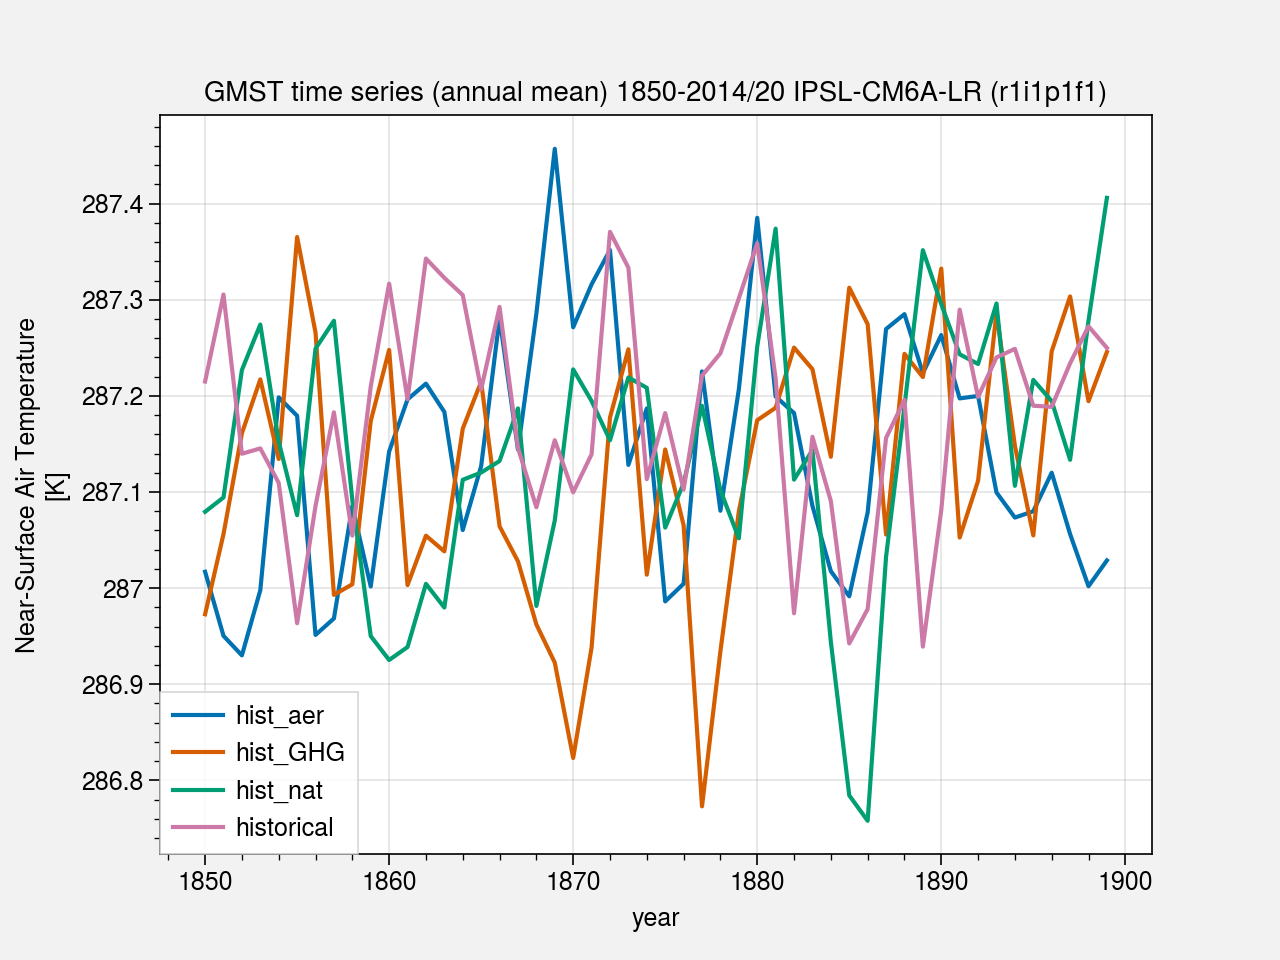

In [8]:
for i, ts in enumerate(ts_list):
    ts.plot(label=hist_labels[i])
    
plt.legend()
plt.title('GMST time series (annual mean) 1850-2014/20 IPSL-CM6A-LR (r1i1p1f1)')
# plt.savefig('img/GMST_ts_1850-2020_IPSL-CM6A-LR_r1i1p1f1.jpg')

Text(0.5, 1.0, 'Argentière glacier (nearest grid cell) time series (annual mean) 1850-2014/20 IPSL-CM6A-LR (r1i1p1f1)')

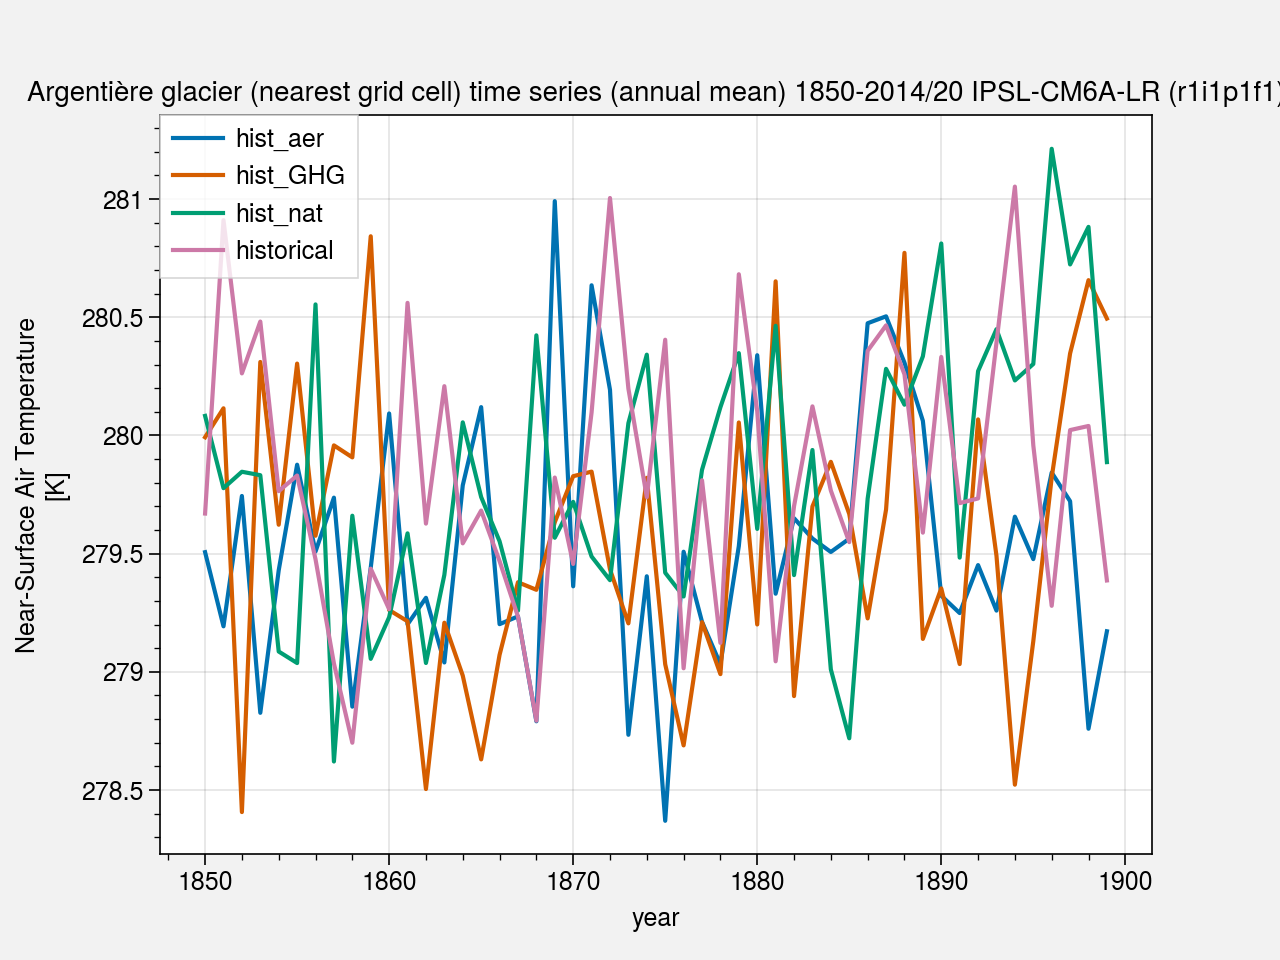

In [9]:
for i, ts in enumerate(ts_local_list):
    ts.plot(label=hist_labels[i])
    
plt.legend()
plt.title('Argentière glacier (nearest grid cell) time series (annual mean) 1850-2014/20 IPSL-CM6A-LR (r1i1p1f1)')
# plt.savefig('img/GMST_ts_local_1850-2020_IPSL-CM6A-LR_r1i1p1f1.jpg')

Text(0.5, 1.0, 'Argentière glacier (nearest grid cell) time series (annual mean) 1850-2014/20 IPSL-CM6A-LR (r1i1p1f1)')

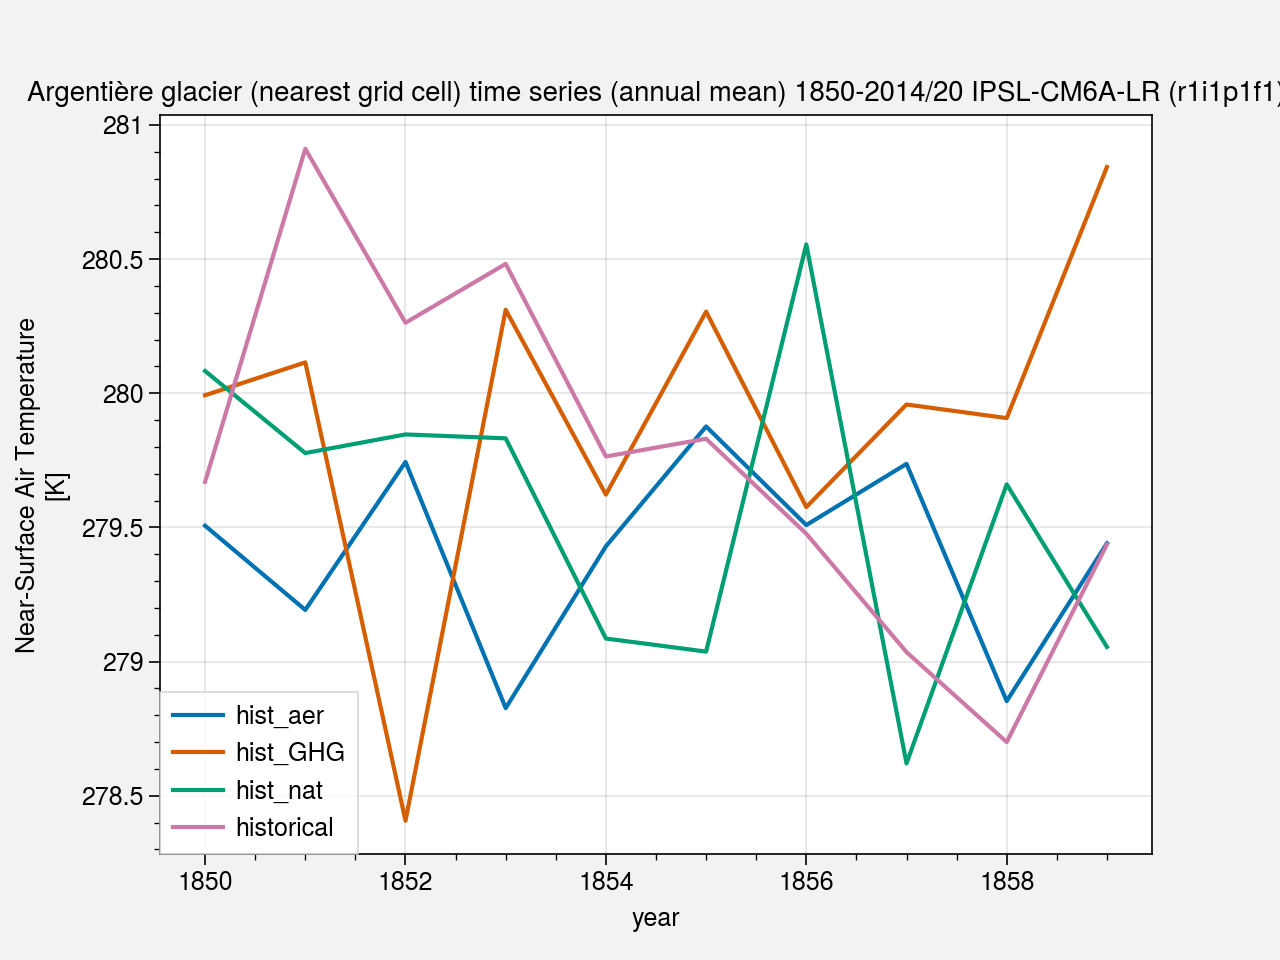

In [10]:
for i, ts in enumerate(ts_local_list):
    ts[:10].plot(label=hist_labels[i])
    
plt.legend()
plt.title('Argentière glacier (nearest grid cell) time series (annual mean) 1850-2014/20 IPSL-CM6A-LR (r1i1p1f1)')
# plt.savefig('img/GMST_ts_local_1850-2020_IPSL-CM6A-LR_r1i1p1f1.jpg')